In [2]:
import warnings
warnings.filterwarnings("ignore")

import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow
from time import time


In [40]:
data_dir = "/data/oxford102"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

In [41]:
# Original Image Labels
labels = np.loadtxt(os.path.join(data_dir, 'imagelabels.csv'), dtype=int)

# Flower class labels. The index of `labels` matches the index of `class_labels` 
class_labels = ['pink primrose', 'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea', 'english marigold', 'tiger lily', 'moon orchid', 'bird of paradise', 'monkshood', 'globe thistle', 'snapdragon', "colt's foot", 'king protea', 'spear thistle', 'yellow iris', 'globe-flower', 'purple coneflower', 'peruvian lily', 'balloon flower', 'giant white arum lily', 'fire lily', 'pincushion flower', 'fritillary', 'red ginger', 'grape hyacinth', 'corn poppy', 'prince of wales feathers', 'stemless gentian', 'artichoke', 'sweet william', 'carnation', 'garden phlox', 'love in the mist', 'mexican aster', 'alpine sea holly', 'ruby-lipped cattleya', 'cape flower', 'great masterwort', 'siam tulip', 'lenten rose', 'barbeton daisy', 'daffodil', 'sword lily', 'poinsettia', 'bolero deep blue', 'wallflower', 'marigold', 'buttercup', 'oxeye daisy', 'common dandelion', 'petunia', 'wild pansy', 'primula', 'sunflower', 'pelargonium', 'bishop of llandaff', 'gaura', 'geranium', 'orange dahlia', 'pink-yellow dahlia?', 'cautleya spicata', 'japanese anemone', 'black-eyed susan', 'silverbush', 'californian poppy', 'osteospermum', 'spring crocus', 'bearded iris', 'windflower', 'tree poppy', 'gazania', 'azalea', 'water lily', 'rose', 'thorn apple', 'morning glory', 'passion flower', 'lotus', 'toad lily', 'anthurium', 'frangipani', 'clematis', 'hibiscus', 'columbine', 'desert-rose', 'tree mallow', 'magnolia', 'cyclamen ', 'watercress', 'canna lily', 'hippeastrum ', 'bee balm', 'ball moss', 'foxglove', 'bougainvillea', 'camellia', 'mallow', 'mexican petunia', 'bromelia', 'blanket flower', 'trumpet creeper', 'blackberry lily']

## Inspect a few images of a few categories

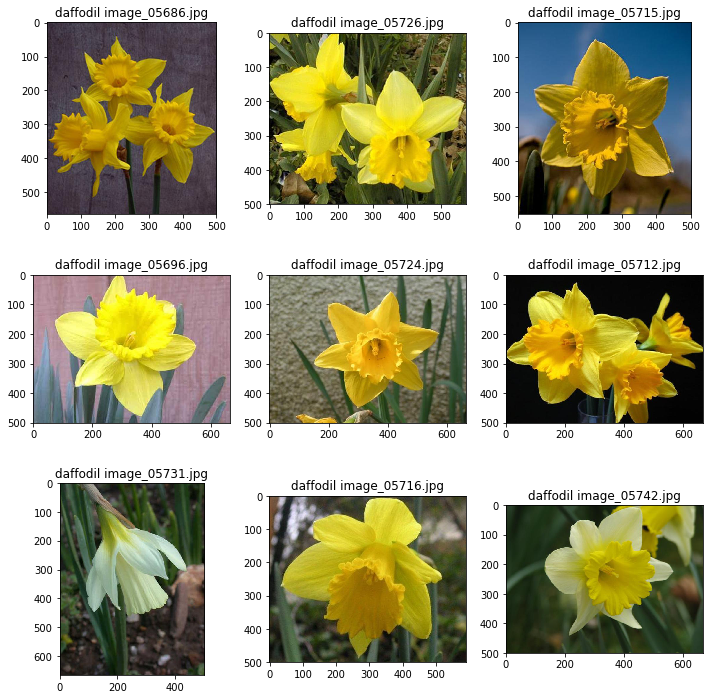

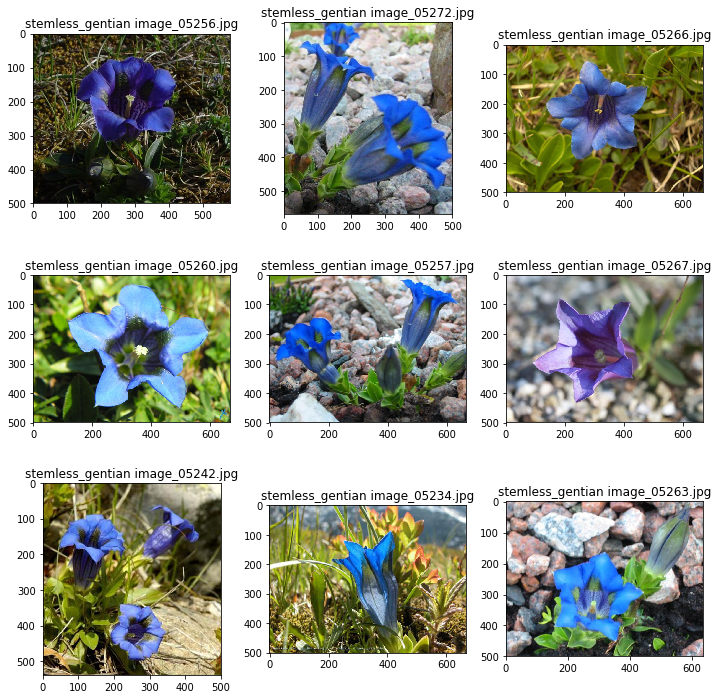

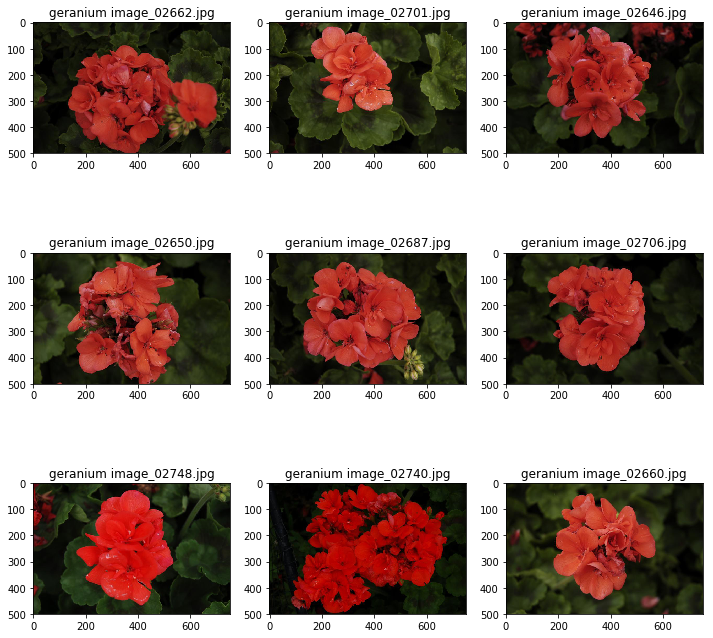

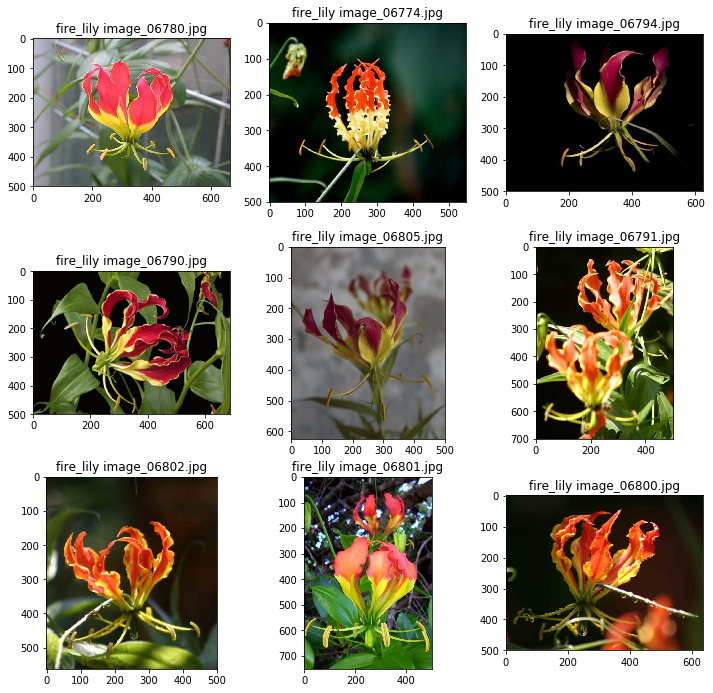

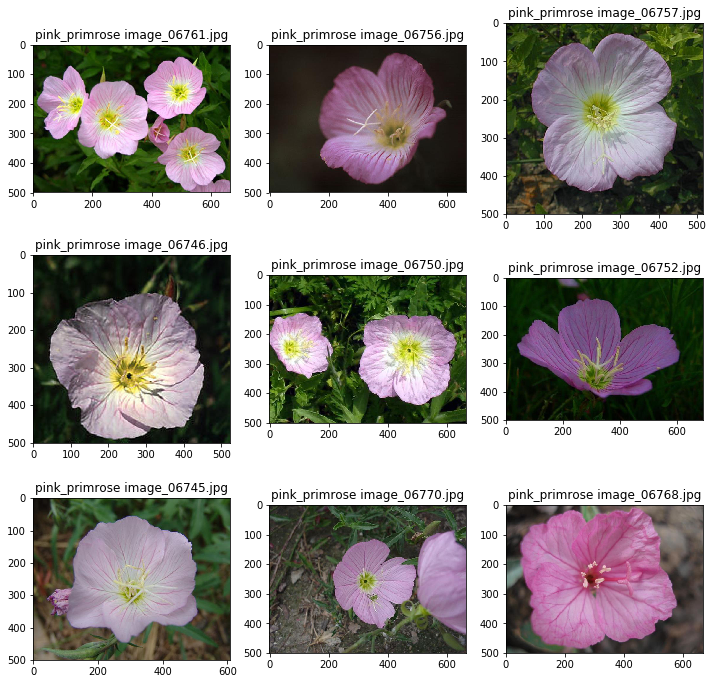

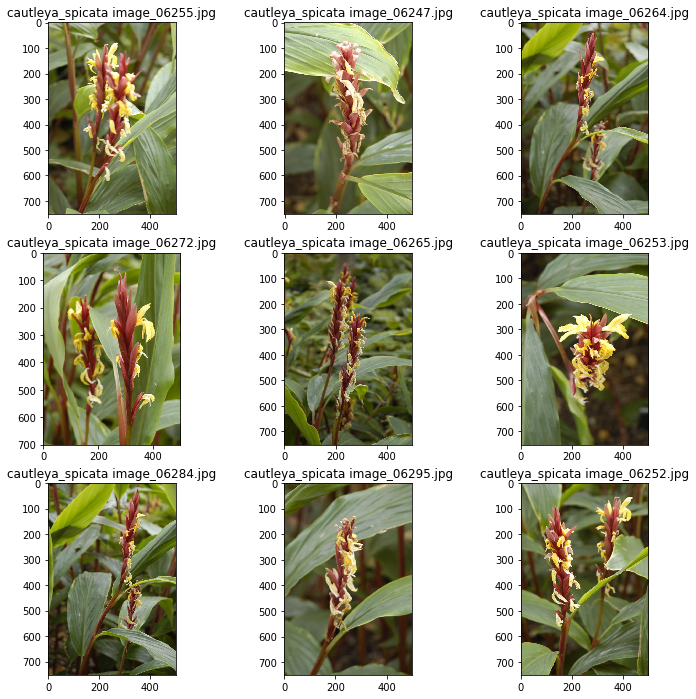

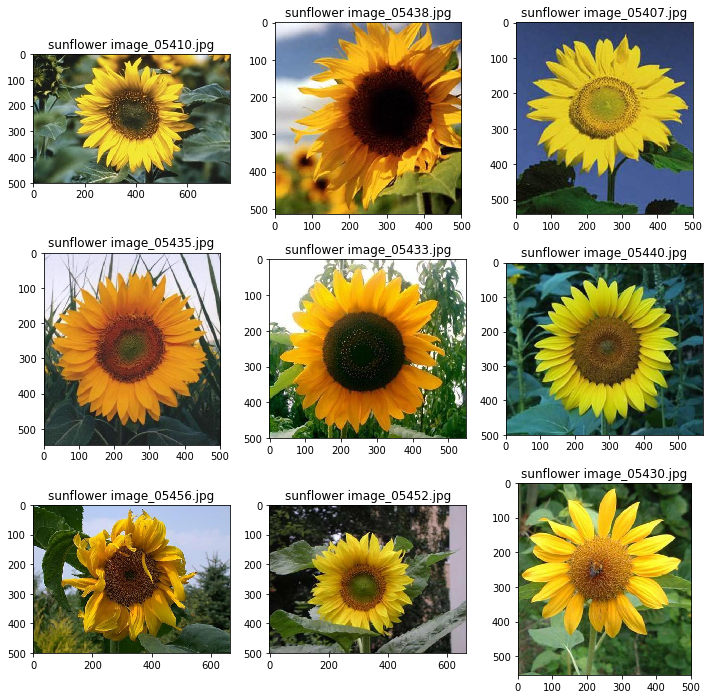

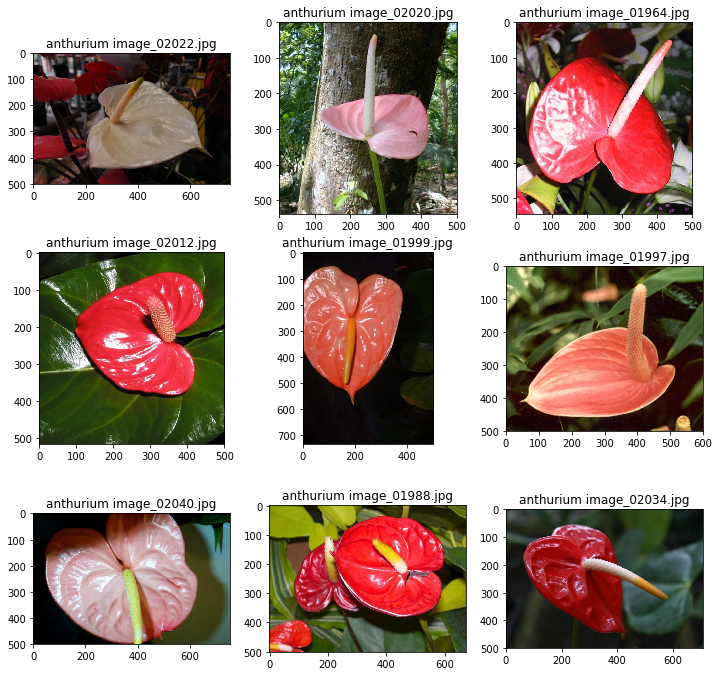

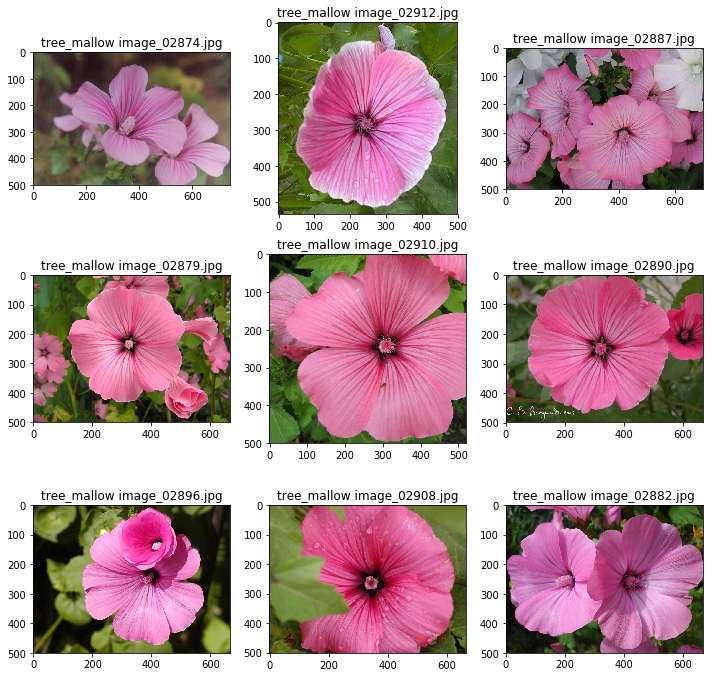

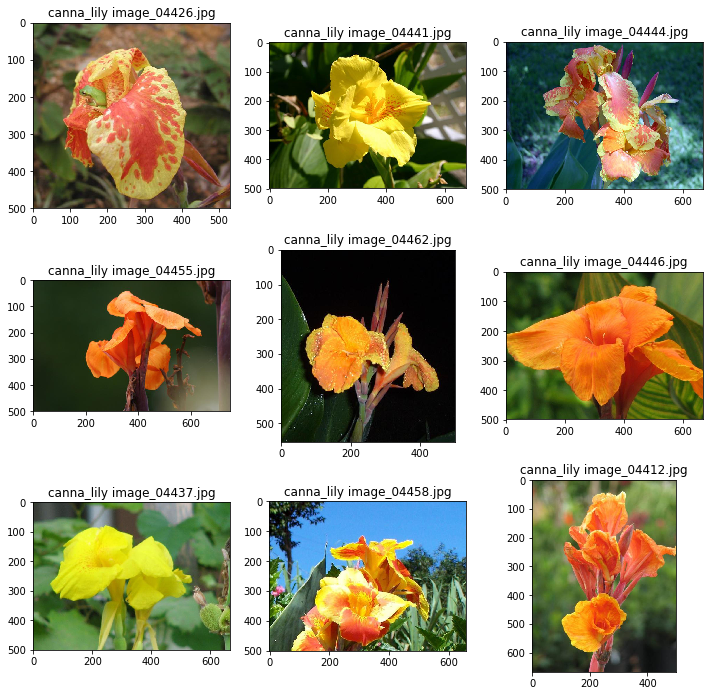

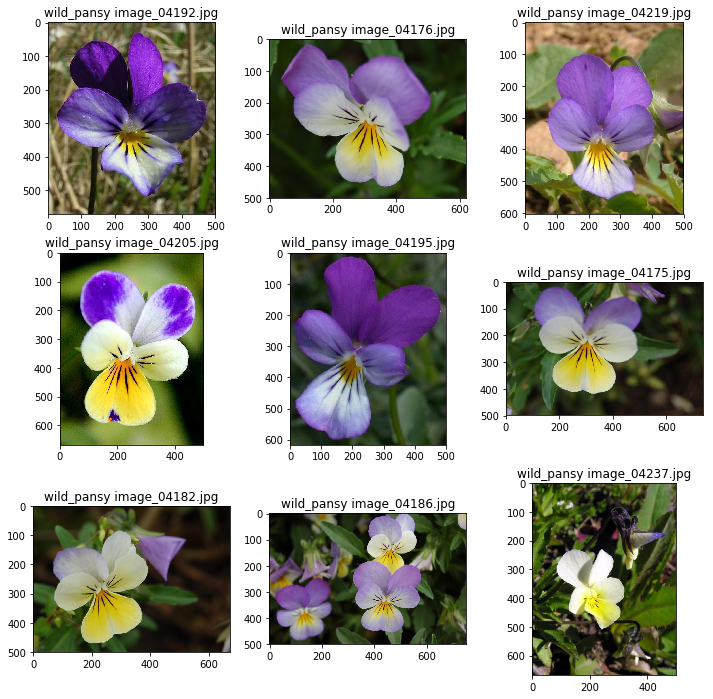

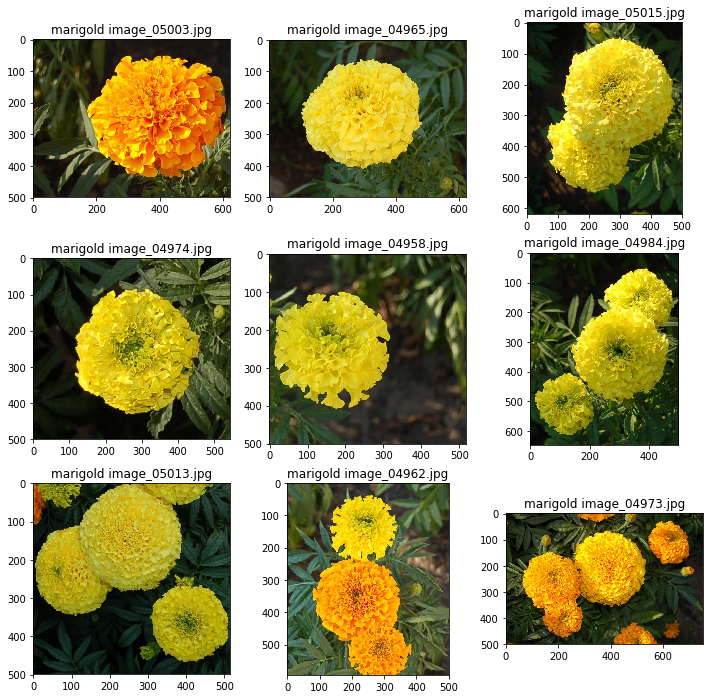

In [63]:
def visualize_images():
    np.random.seed = 42
    categories = np.random.choice(os.listdir(train_dir), size=12, replace=False)
    image_shapes = []
    for category in categories:
        imgs = np.random.choice(os.listdir(os.path.join(train_dir, category)), size=9, replace=False)
        w=10
        h=10
        fig=plt.figure(figsize=(12, 12))
        columns = 3
        rows = 3
        for i in range(1, columns*rows +1):
            #img = np.random.randint(10, size=(h,w))
            ax = fig.add_subplot(rows, columns, i)
            ax.set_title(category + " " + imgs[i-1])
            img=mpimg.imread(os.path.join(train_dir, category, imgs[i-1]))
            image_shapes.append(img.shape)
            imgplot = plt.imshow(img)
        plt.show()
        
visualize_images()

## Inspect image sizes / shape

In [56]:
print("Mean across 3 dimentions:", np.mean(image_shapes, axis=0))

Mean across 3 dimentions [542.75925926 611.16666667   3.        ]


In [58]:
print("Max across 3 dimentions:", np.max(image_shapes, axis=0))

Max across 3 dimentions: [752 825   3]


In [59]:
print("Min across 3 dimentions:", np.min(image_shapes, axis=0))

Min across 3 dimentions: [500 500   3]


In [60]:
print("standard deviation across 3 dimentions:", np.std(image_shapes, axis=0))

standard deviation across 3 dimentions: [77.12602366 99.8629153   0.        ]


## Inspect the distribution of images per category

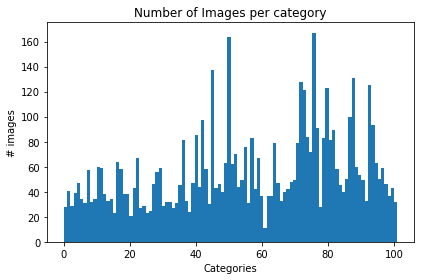

In [89]:
def plot_hist_images_per_cat():
    n_images = [len(os.listdir(os.path.join(train_dir, cat.replace(" ", "_")))) for cat in class_labels]
    fig, ax = plt.subplots()
    #n, bins, patches = ax.hist(x, num_bins, normed=1)
    n, bins, patches = plt.hist(range(len(n_images)),  weights=n_images, bins=102)

    ax.set_xlabel('Categories')
    ax.set_ylabel('# images')
    ax.set_title('Number of Images per category')

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()

    plt.show()
plot_hist_images_per_cat()